In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/scratch/s190619/Data_etc/MedQA/MedQAQueries_disorders_full_v2.csv").drop("Unnamed: 0",axis=1)

In [3]:
df.columns = ['qid', 'query', 'answer', 'options', 'meta_info', 'Disorder', 'CUI',
              'TUI', 'short_category', 'long_category', 'description', 'CUI_METAMAP']
df = df.drop_duplicates("query")
df.head()

,qid,query,answer,options,meta_info,Disorder,CUI,TUI,short_category,long_category,description,CUI_METAMAP
0,3,A pulmonary autopsy specimen from a 58-year-ol...,Thromboembolism,"{'A': 'Thromboembolism', 'B': 'Pulmonary ische...",step1,True,C0040038,T046,DISO,Disorders,Pathologic Function,['C0040038']
1,4,A 20-year-old woman presents with menorrhagia ...,Von Willebrand disease,"{'A': 'Factor V Leiden', 'B': 'Hemophilia A', ...",step1,True,C0042974,T047,DISO,Disorders,Disease or Syndrome,['C0042974']
2,5,A 40-year-old zookeeper presents to the emerge...,Scorpion sting,"{'A': 'Aspirin', 'B': 'Oral contraceptive pill...",step1,True,C0238417,T037,DISO,Disorders,Injury or Poisoning,['C0238417']
4,21,An investigator is studying the function of th...,Anorexia,"{'A': 'Hypothermia', 'B': 'Hyperthermia', 'C':...",step1,True,C0003123,T047,DISO,Disorders,Disease or Syndrome,"['C0003123', 'C1971624']"
7,23,A 42-year-old woman is in the hospital recover...,Delirium tremens,"{'A': 'Acute cholangitis', 'B': 'Alcoholic hal...",step1,True,C0001957,T047,DISO,Disorders,Disease or Syndrome,['C0001957']


In [4]:
df.columns

Index(['qid', 'query', 'answer', 'options', 'meta_info', 'Disorder', 'CUI',
       'TUI', 'short_category', 'long_category', 'description', 'CUI_METAMAP'],
      dtype='object')

### Analyse structure an stuff

In [13]:
from nltk import word_tokenize

In [14]:
count_tokens = []
for i in range(df.shape[0]):
    count_tokens.append(len(word_tokenize(df["query"].iloc[i])))

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

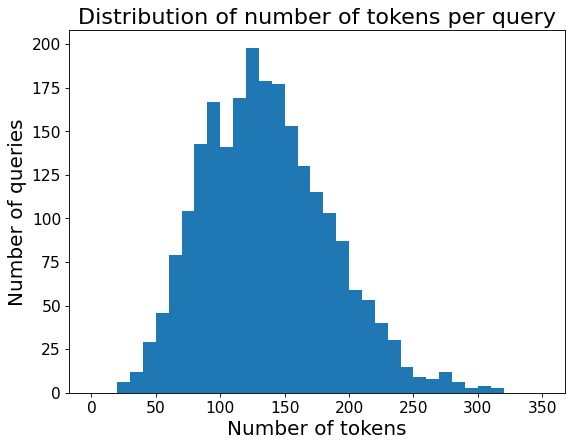

In [26]:
bins = [x*10 for x in list(range(36))]


figure(figsize=(8, 6), dpi=80)

plt.hist(count_tokens, bins=bins)
#plt.hist(sum(count_tokens)/len(count_tokens),color='r')
plt.xlabel("Number of tokens", fontsize=18)
plt.ylabel("Number of queries", fontsize=18)
plt.title("Distribution of number of tokens per query", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()

In [31]:
import numpy as np
np.percentile(np.array(count_tokens),98)

249.80000000000018

In [9]:
word_tokenize(df["query"].iloc[0])[:32]

['A',
 'pulmonary',
 'autopsy',
 'specimen',
 'from',
 'a',
 '58-year-old',
 'woman',
 'who',
 'died',
 'of',
 'acute',
 'hypoxic',
 'respiratory',
 'failure',
 'was',
 'examined',
 '.',
 'She',
 'had',
 'recently',
 'undergone',
 'surgery',
 'for',
 'a',
 'fractured',
 'femur',
 '3',
 'months',
 'ago',
 '.',
 'Initial']

In [10]:
df["query"].iloc[0]

'A pulmonary autopsy specimen from a 58-year-old woman who died of acute hypoxic respiratory failure was examined. She had recently undergone surgery for a fractured femur 3 months ago. Initial hospital course was uncomplicated, and she was discharged to a rehab facility in good health. Shortly after discharge home from rehab, she developed sudden shortness of breath and had cardiac arrest. Resuscitation was unsuccessful. On histological examination of lung tissue, fibrous connective tissue around the lumen of the pulmonary artery is observed. Which of the following is the most likely pathogenesis for the present findings?'